### Project ID: PRCP-1018-Bike Rental

**Problem statement :-**
Prediction of daily bike rental count based on the environmental and seasonal settings.

**Attributes Information of given dataset:**
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [1]:
# Importing libraries recquired for project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
hour_data=pd.read_csv('hour.csv')
day_data= pd.read_csv('day.csv')

In [4]:
hour_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


 As per problem statement takes into acccount environmental and seasonal settings,
 so for rental bike count daily basis rather than an hourly basis can have several 
 advantages from a business perspective:
 
**Simplicity**: Daily predictions aggregate data over 24 hours, simplifying the model and reducing the amount of data needed. This can make the model easier to understand and interpret.

**Reduced Noise**: Hourly data can be noisy due to short-term fluctuations. By using daily data, you’re focusing on the overall trend, which can help reduce the impact of noise and outliers.

**Resource Optimization**: As prediction does not require hourly precision, predicting on a daily basis can save computational resources and time.

**Business Planning**: Daily predictions can be more useful for strategic decisions.

**Seasonality and Trends**: Daily data might capture patterns related to day of the week or public holidays better than hourly data.

### Exploratory Data Analysis

In [6]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
day_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [8]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [23]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
day_data['day'] = day_data['dteday'].dt.day

In [6]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30


In [7]:
day_data = day_data.drop('dteday', axis=1)

In [8]:
day_data = day_data.drop('instant', axis=1)

In [9]:
day_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30


In [10]:
day_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.738714
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.809949
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,8.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,31.000000


In [42]:
day_data.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

In [12]:
columns_to_check = ['season', 'yr', 'mnth', 'weekday', 'holiday', 'workingday','weathersit']
for i in columns_to_check:
    print(i,day_data[i].unique())
    

season [1 2 3 4]
yr [0 1]
mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
weekday [6 0 1 2 3 4 5]
holiday [0 1]
workingday [0 1]
weathersit [2 1 3]


0 minimum value not possible in humidity column  so its a corrupted data.

In [58]:
day_data.duplicated().sum()

0

### Data Preprocessing 

**handelling corrupted data**


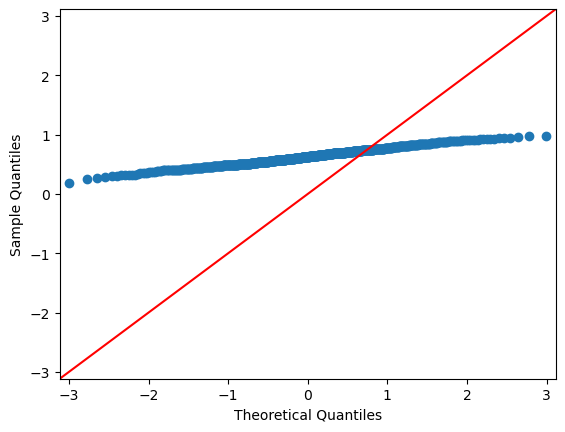

In [74]:
sm.qqplot(day_data['hum'], line='45')
plt.show()

In [ ]:
If column 'hum' points in the plot roughly fall along a straight diagonal line, 
then the data is assumed to be normally distributed otherwise not.

In [67]:
# Kolmogorov-Smirnov Test:
stat, p = shapiro(day_data['hum'])#
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.995, p=0.010


In [ ]:
p value less than 0.05 of this column (hum) so we are not going to replace corrupt data with mean but median.
(If the p-value of the test is greater than 0.05, then the data is assumed to be normally distributed)

In [13]:
day_data.hum.replace(0,np.median(day_data.hum),inplace=True)

In [14]:
day_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837,15.738714
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452,8.809949
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000,8.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,31.000000


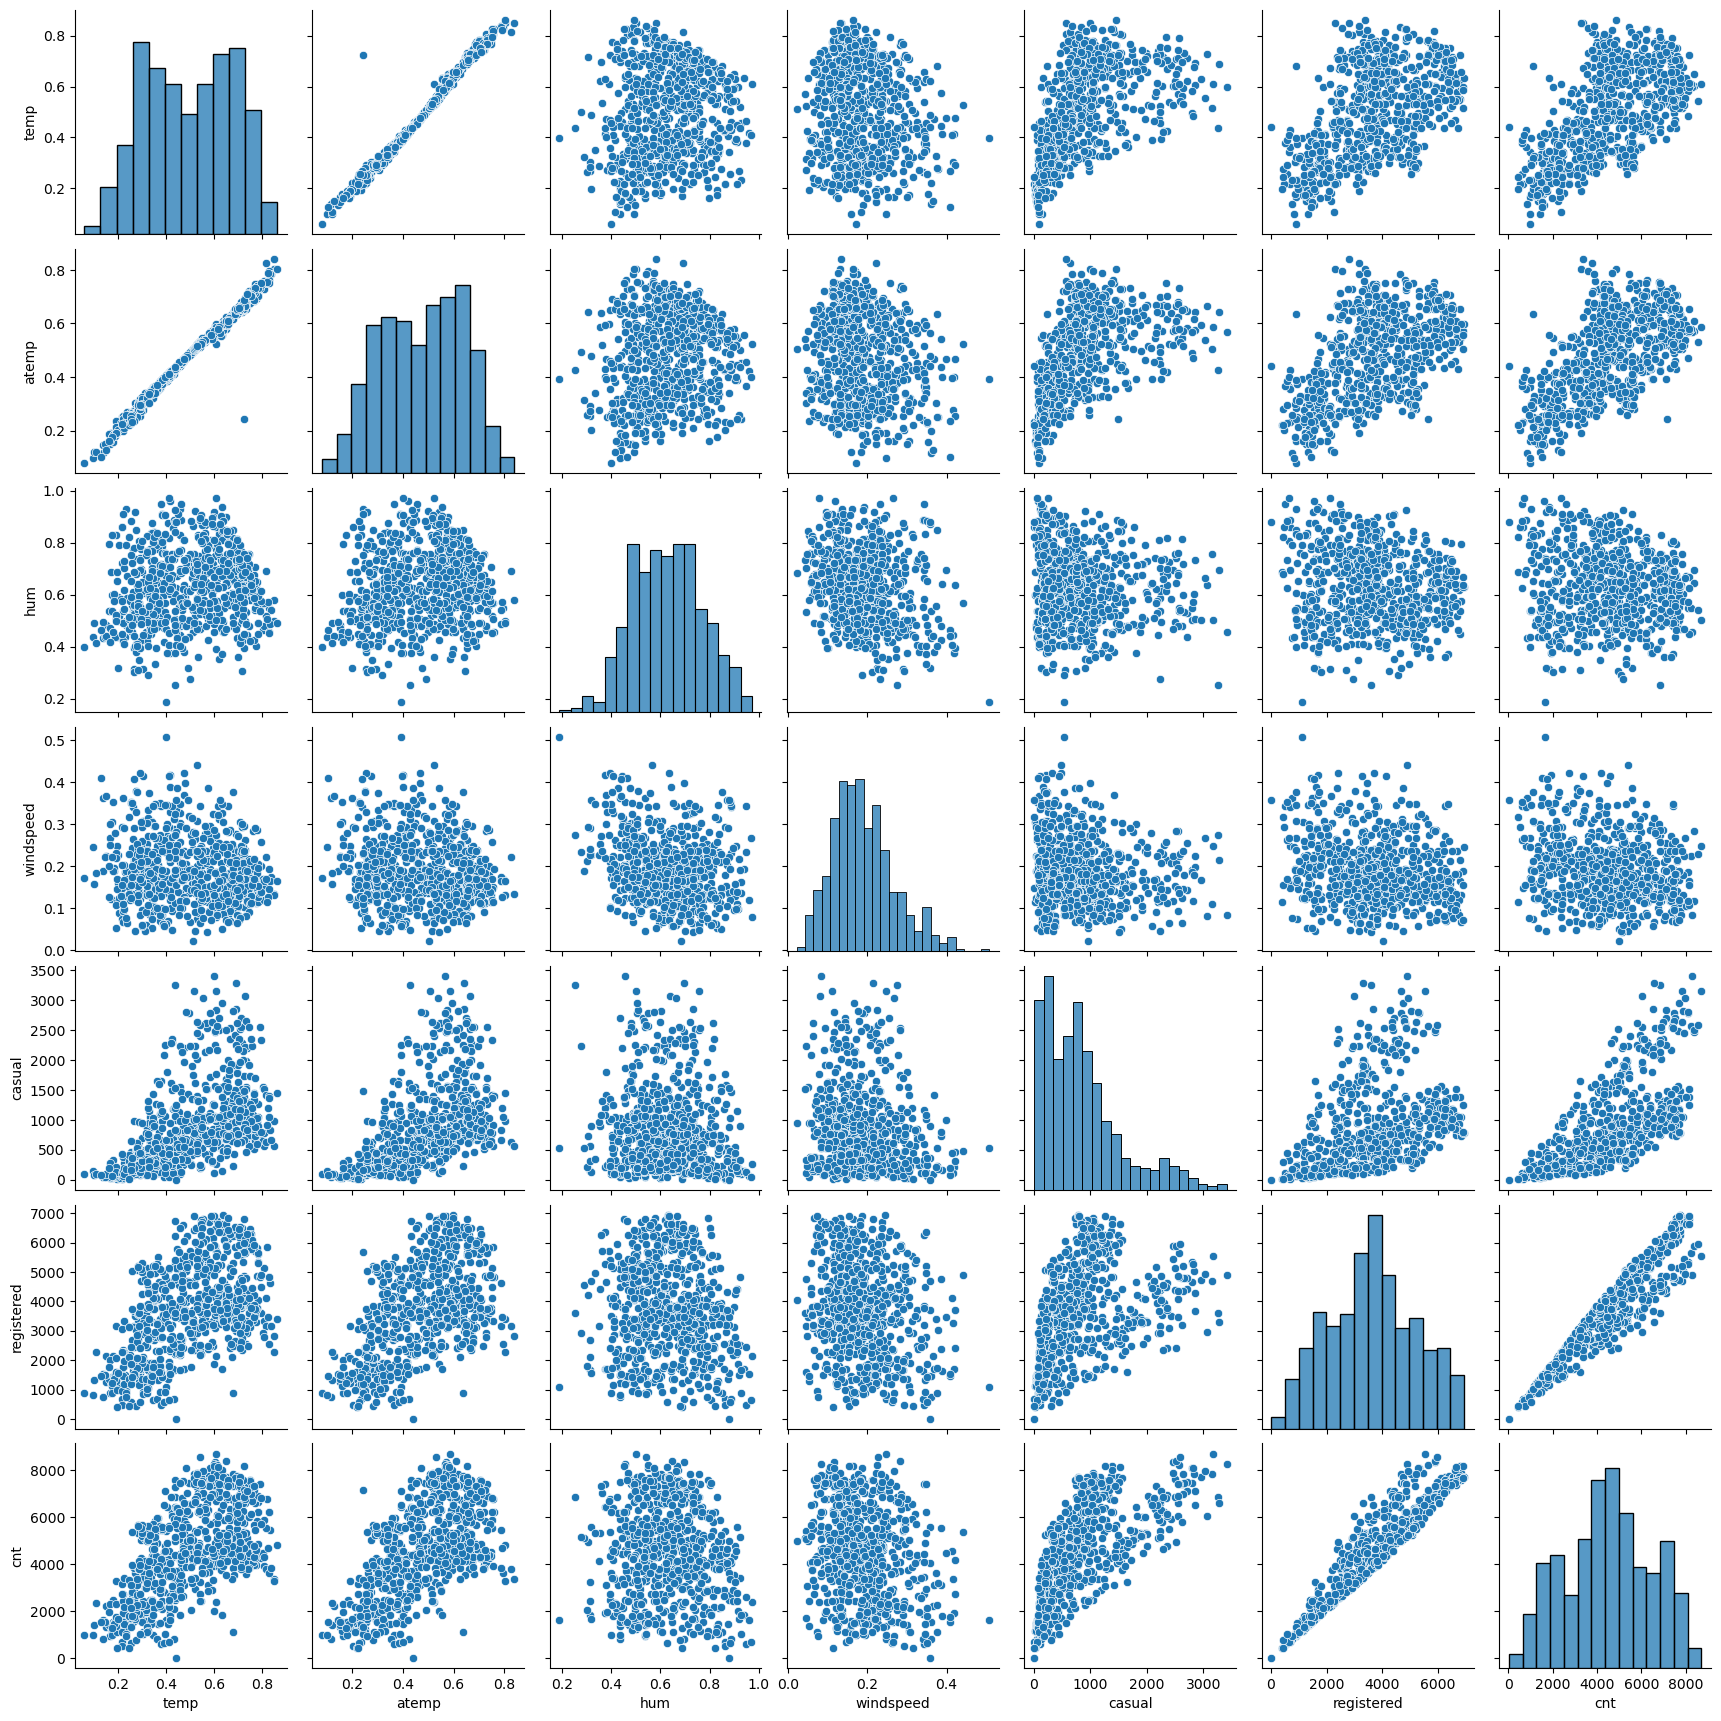

In [79]:
#Univariate analysis
sns.pairplot(day_data[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
plt.show()

In [ ]:
Temp and atemp has high correlation. registred and cnt has high correlation.
and relation between other features is not clear.

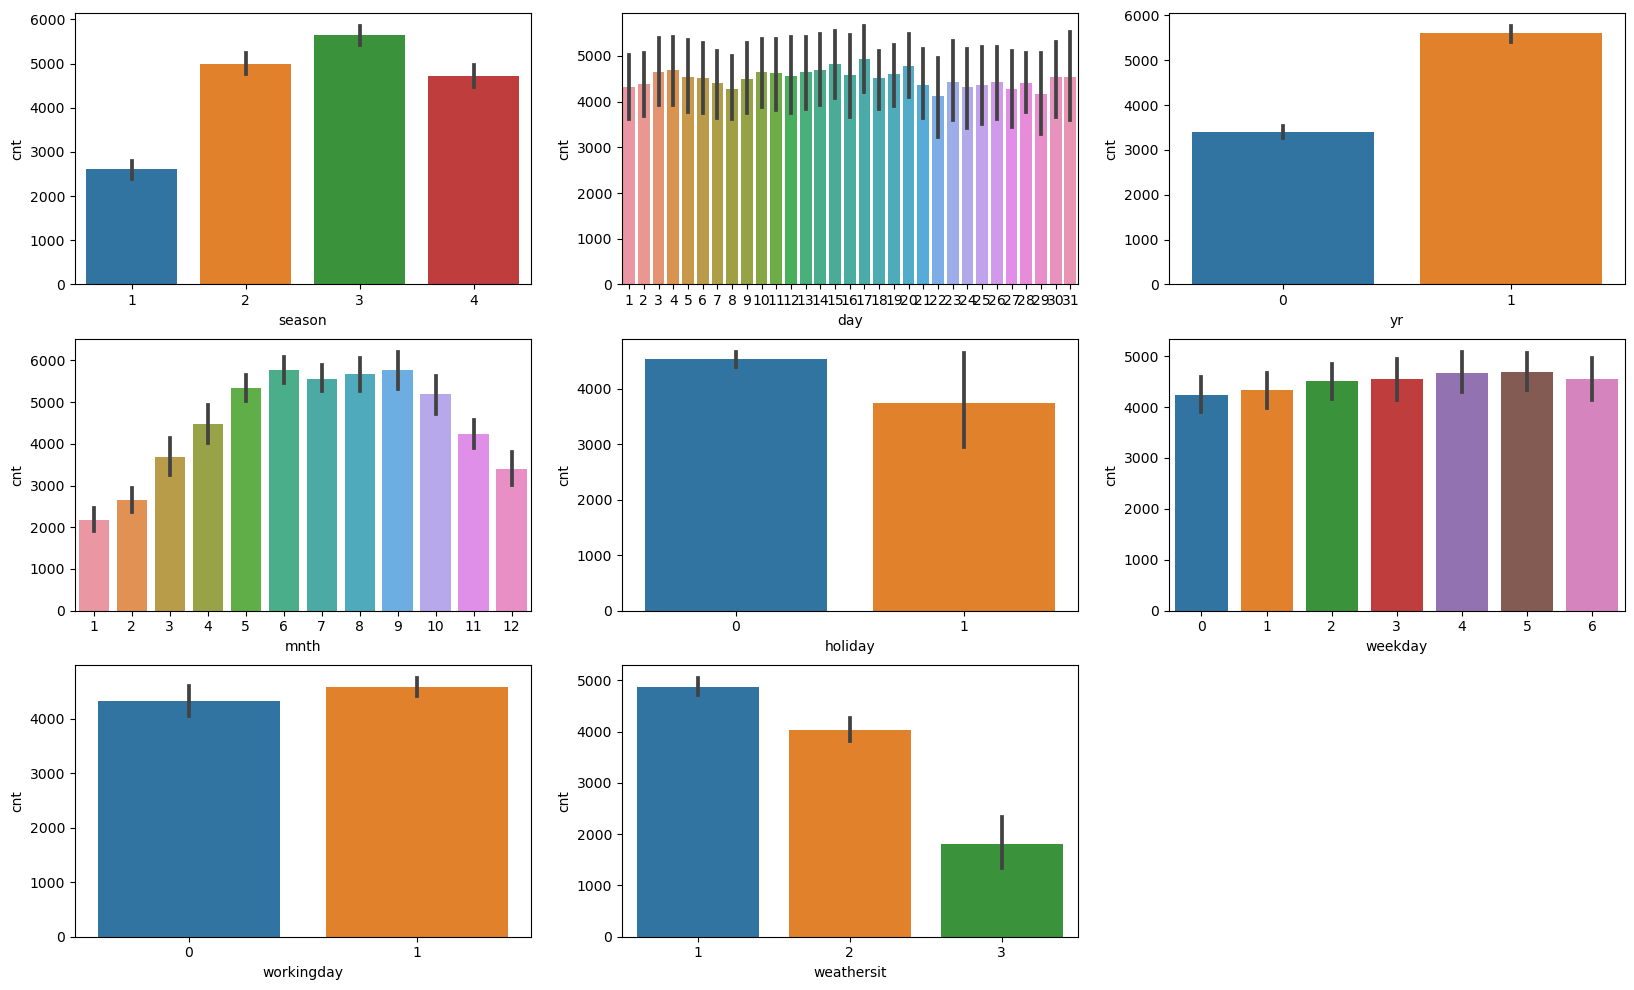

In [92]:
features = ['season','day', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(20, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=feature, y='cnt', data=day_data)

plt.show()

**Insights:**
season 3 has highest rentalbike count.
from day data isn't showing any clarity.
2012 year has seen >75% growth.
monthly pattern shows noraml distribution of rentalbike count use.
weekday rental bike count shows uniform distribution
workingday has slightly more bike count than non workingday
in type 1 and 2 there is large numbers of bike count than type 3

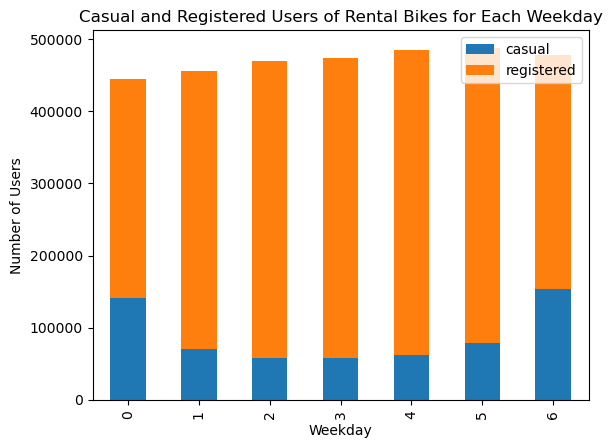

In [93]:
#multivariate analysis
weekday_data = day_data.groupby('weekday').sum()[['casual', 'registered']]

weekday_data.plot(kind='bar', stacked=True)
plt.xlabel('Weekday')
plt.ylabel('Number of Users')
plt.title('Casual and Registered Users of Rental Bikes for Each Weekday')
plt.show()

this is ‘casual’ and ‘registered’ users for each weekday over the entire duration (2 years) of the dataset.

number of casual user increase on weekend which indicates people having holiday on weekends use it.

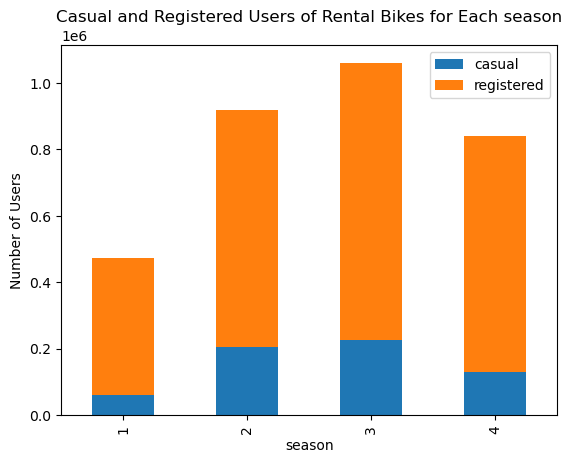

In [97]:
season_data = day_data.groupby('season').sum()[['casual', 'registered']]

season_data.plot(kind='bar', stacked=True)
plt.xlabel('season')
plt.ylabel('Number of Users')
plt.title('Casual and Registered Users of Rental Bikes for Each season')
plt.show()

Higher Registered Users:
The number of registered users is consistently higher than casual users across all seasons. This could indicate that the bike rental service has a strong user base of regular customers.

Seasonal Variation: 
There is a noticeable variation in bike usage across different seasons. The number of users increases from season 1 to season 3, and then decreases in season 4. This could be due to weather conditions or other seasonal factors affecting bike usage.

Potential for Growth: The presence of casual users in all seasons suggests there is potential to convert these casual users into registered users, thereby increasing the user base.

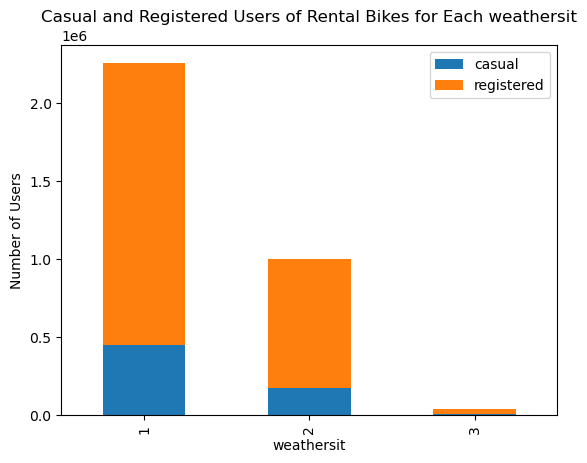

In [108]:
weathersit_data = day_data.groupby('weathersit').sum()[['casual', 'registered']]

weathersit_data.plot(kind='bar', stacked=True)
plt.xlabel('weathersit')
plt.ylabel('Number of Users')
plt.title('Casual and Registered Users of Rental Bikes for Each weathersit')
plt.show()

weather situation wise no of users decrease drastically for weather situation 2 and in 3 type very miniscule.
type 1 weather is prefered by both casual and registered user

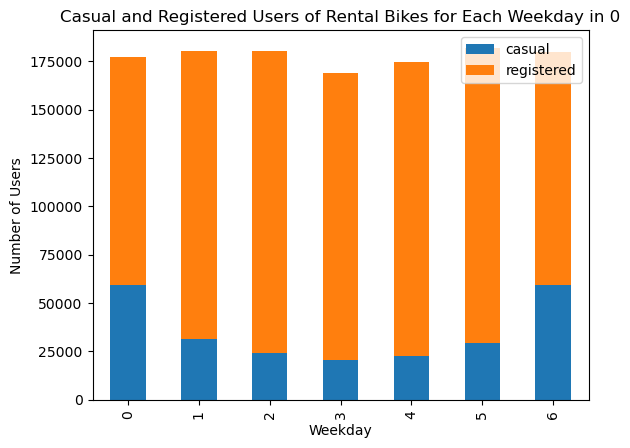

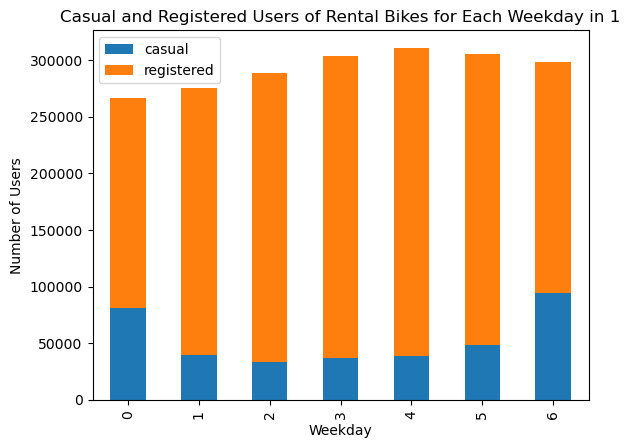

In [107]:
weekday_year_data = day_data.groupby(['yr', 'weekday']).sum()[['casual', 'registered']]

# Plotting data for each year separately.
for year in day_data['yr'].unique():
    weekday_year_data.loc[year].plot(kind='bar', stacked=True)
    plt.xlabel('Weekday')
    plt.ylabel('Number of Users')
    plt.title(f'Casual and Registered Users of Rental Bikes for Each Weekday in {year}')
    plt.show()

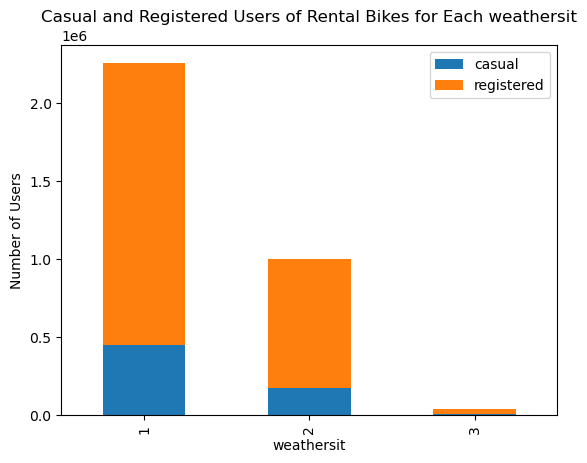

In [104]:
in both 2011 and 2012 number of user in weekday shows near uniform distbution.

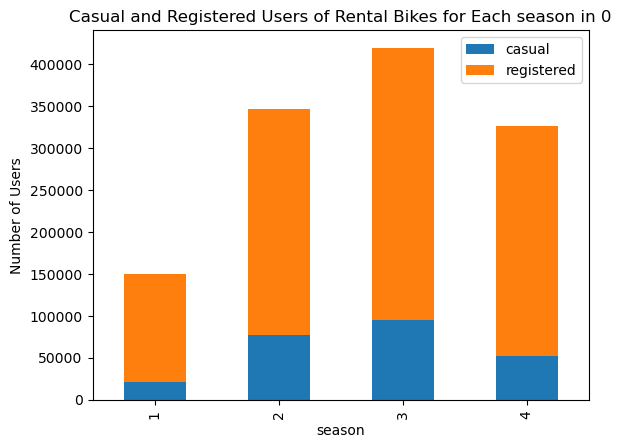

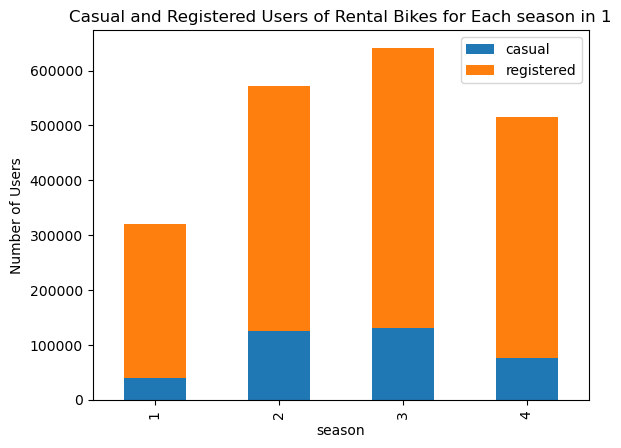

In [112]:
yr_season_data = day_data.groupby(['yr', 'season']).sum()[['casual', 'registered']]

# Plotting data for each year separately.
for yr in day_data['yr'].unique():
    yr_season_data.loc[yr].plot(kind='bar', stacked=True)
    plt.xlabel('season')
    plt.ylabel('Number of Users')
    plt.title(f'Casual and Registered Users of Rental Bikes for Each season in {yr}')
    plt.show()

for both 2011 and 2012 both category of users followed same pattern but 
2012 shows increased in bike users across categories and season

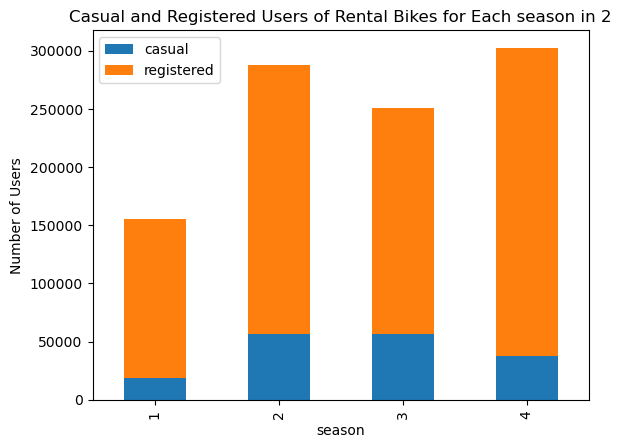

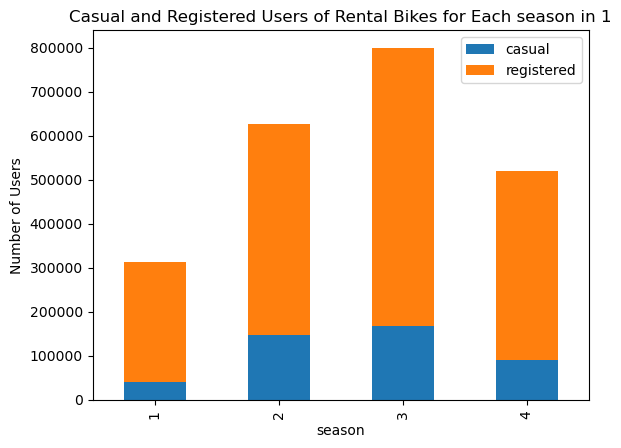

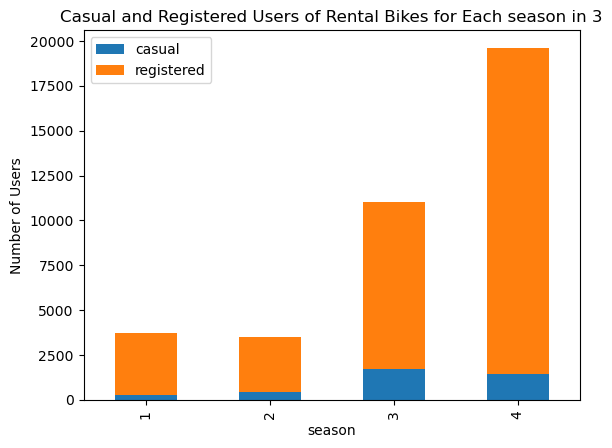

In [114]:
weathersit_season_data = day_data.groupby(['weathersit', 'season']).sum()[['casual', 'registered']]

# Plotting data for each year separately.
for weathersit in day_data['weathersit'].unique():
    weathersit_season_data.loc[weathersit].plot(kind='bar', stacked=True)
    plt.xlabel('season')
    plt.ylabel('Number of Users')
    plt.title(f'Casual and Registered Users of Rental Bikes for Each season in {weathersit}')
    plt.show()

season 3 witnesses highest no of rental bike users in both category type 1 weathersit. 
It inidicates weather situation is also favourable for bike users.

season 1 is witnesses lowest bike users in both category in all weathersit.
It inidicates weather situation is not so favourable.

season 1 and 2 witnesses drastic decrease in bike users in both category in weathersit type 3.
It indicates weathersit type 3 mostly happens in these seasons. 
season 3 also gets affected  by weather type 3 but not that drastically.

season 4 witnesses highest users in weathersit type 2 and 3 than others.
It inidicates in season 4, weather situation type 3 is not that severe compared to season 1,2 and 3.

weathersit type 1 is most favoured by users while type 3 is least favoured.

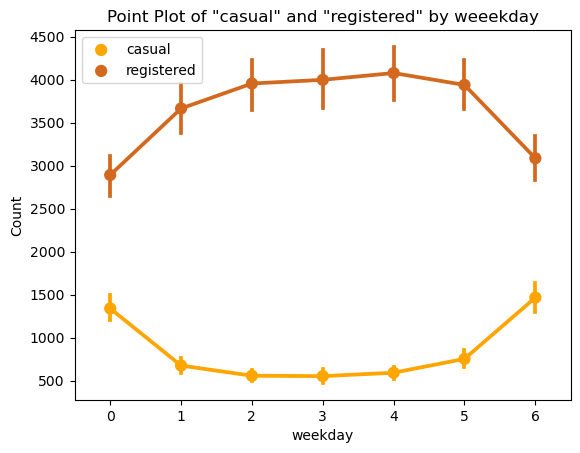

In [116]:
# Bivariate analysis
sns.pointplot(data=day_data, x='weekday', y='casual', color='orange', label='casual')
sns.pointplot(data=day_data, x='weekday', y='registered', color='chocolate', label='registered')

plt.title('Point Plot of "casual" and "registered" by weeekday')
plt.xlabel('weekday')
plt.ylabel('Count')
plt.legend()

plt.show()

CAsual rental bike count increase on weeekend and decrese on weekdays and vice versa is true for registered rental bikes.

### Handelling Outlier

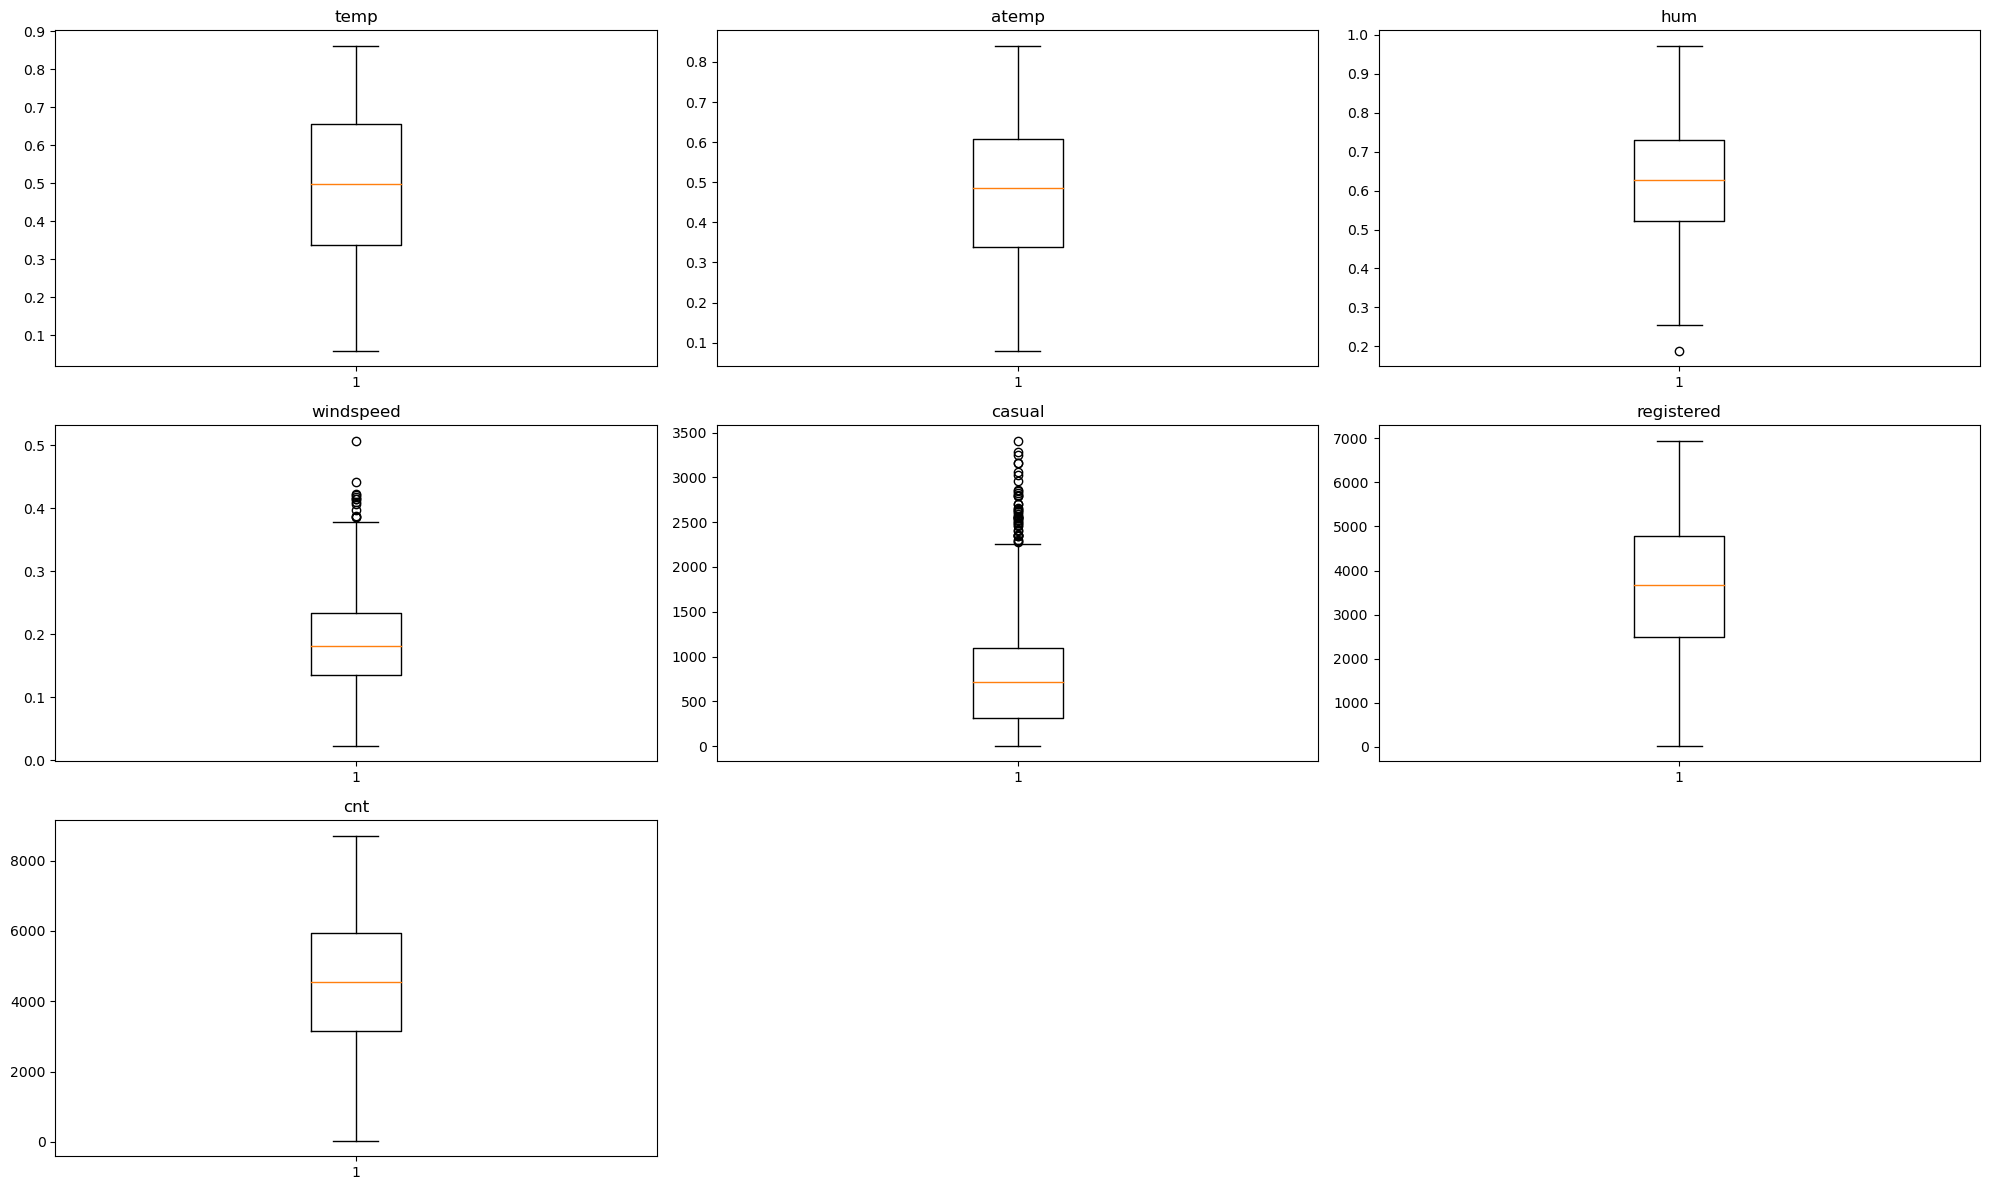

In [15]:
plt.figure(figsize=(20, 12))
columns_to_plot = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

for i in range(len(columns_to_plot)):
    plt.subplot(3, 3, i+1)
    plt.boxplot(day_data[columns_to_plot[i]])
    plt.title(columns_to_plot[i])
plt.tight_layout()
plt.show()


In [ ]:
I using IQR method for handelling outlier for windspeed because it is suitable when the percentage 
of outliers is small(1%-3%), without significantly affecting the overall data distribution.

In [10]:
from scipy import stats
# using IQR to remove the outliers
IQR = stats.iqr(day_data.windspeed, interpolation = 'midpoint') 
IQR

0.0982645

In [11]:
Q1 = day_data.windspeed.quantile(0.25)
 
Q3 =day_data.windspeed.quantile(0.75)

min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [12]:
max_limit

0.38061125

In [13]:
min_limit

-0.012446750000000034

In [14]:
day_data.loc[day_data['windspeed'] > max_limit]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
44,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913,14
49,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635,19
93,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115,4
94,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795,5
292,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195,20
382,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376,18
407,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529,12
420,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732,25
432,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382,8
433,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569,9


In [15]:
day_data.loc[day_data['windspeed'] > max_limit,'windspeed']=np.median(day_data.windspeed)

In [16]:
# for casual feature 
IQR = stats.iqr(day_data.casual, interpolation = 'midpoint') 
IQR

780.5

In [17]:
Q1 = day_data.casual.quantile(0.25)
 
Q3 =day_data.casual.quantile(0.75)

min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [18]:
outliers= day_data.loc[day_data['casual'] > max_limit]
num_outliers= len(outliers)

In [19]:
num_outliers

44

In [ ]:
# so around 6% of total feature are outlier and data of this column is skewed one

In [20]:
from scipy.stats.mstats import winsorize

# I used this method as percentage of outliers is little higher (6%), and this method 
# can reduce the impact of outliers on the data distribution without completely removing these data points.

# Winsorize the 'casual' column
day_data['casual_new'] = winsorize(day_data['casual'], limits=[0.06, 0.06])

In [21]:
day_data['casual_new']

0      331
1      131
2      120
3      108
4       96
      ... 
726    247
727    644
728    159
729    364
730    439
Name: casual_new, Length: 731, dtype: int64

In [22]:
day_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,casual_new
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,331
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2,131
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3,120
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4,108
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27,247
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28,644
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29,159
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30,364


In [23]:
# droppping casual column and keep casual_windsorized column
day_data = day_data.drop('casual', axis=1)

In [30]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  registered  731 non-null    int64  
 12  cnt         731 non-null    int64  
 13  day         731 non-null    int64  
 14  casual_new  731 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.8 KB


In [24]:
# scaling
from sklearn.preprocessing import StandardScaler # it makes mean = 0 and scales the data to unit variance

columns_to_scale = ['temp','atemp','hum','windspeed','registered','casual_new']

#Created a StandardScaler object
scaler = StandardScaler()
day_data[columns_to_scale] = scaler.fit_transform(day_data[columns_to_scale])

In [25]:
day_data[columns_to_scale]

,temp,atemp,hum,windspeed,registered,casual_new
0,-0.826662,-0.679946,1.250171,-0.363545,-1.925471,-0.797015
1,-0.721095,-0.740652,0.479113,0.875387,-1.915209,-1.118137
2,-1.634657,-1.749767,-1.339274,0.872153,-1.556689,-1.135799
3,-1.614780,-1.610270,-0.263182,-0.365654,-1.412383,-1.155066
4,-1.467414,-1.504971,-1.341494,0.008502,-1.371336,-1.174334
...,...,...,...,...,...,...
726,-1.318665,-1.521108,0.175807,2.304196,-1.147502,-0.931886
727,-1.323224,-1.346690,-0.266238,-0.433513,-0.772948,-0.294459
728,-1.323224,-1.424344,0.878392,-0.870731,-1.586833,-1.073180
729,-1.309558,-1.490049,-1.015664,2.312930,-1.426493,-0.744030


In [26]:
# Heatmap 
day_heatmap= day_data[columns_to_scale]

<Axes: >

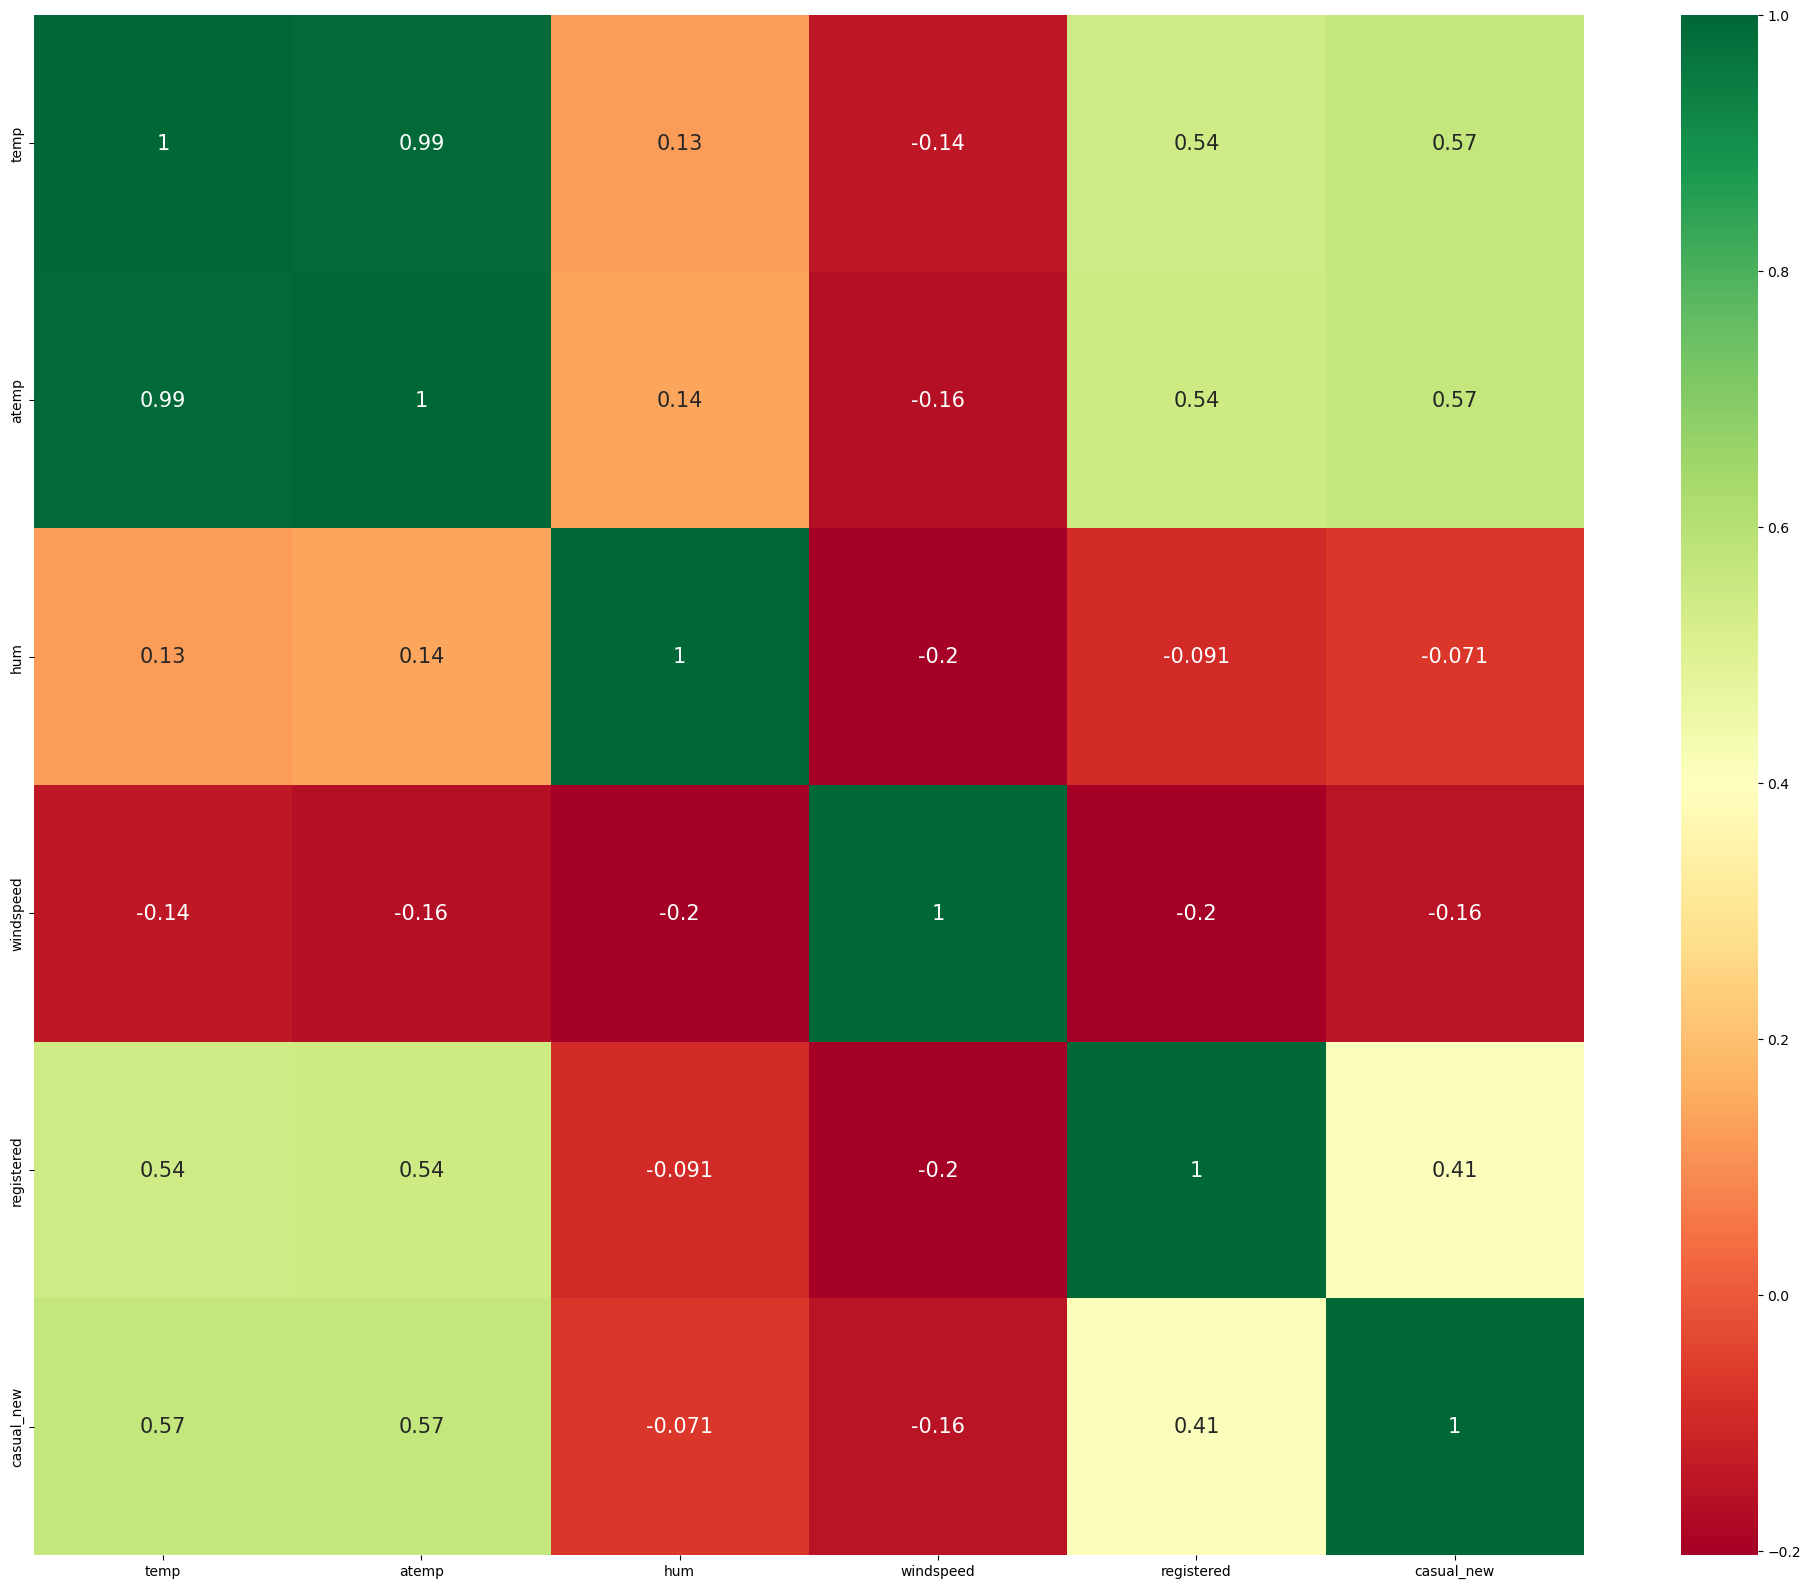

In [27]:
plt.figure(figsize=(25,20))
sns.heatmap(day_heatmap.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":15})

### model creation

In [28]:
#Split X and Y
X = day_data.drop(columns = ['cnt','atemp'])
y = day_data['cnt']

In [29]:
#splitting the training and testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)# X_test is independent variable
y_pred # predicted value for dependent variable

array([6569.81317097, 1567.69766696, 3752.72207734, 6169.17437975,
       7536.43953551, 7269.69252321, 1643.13935126, 2187.0758655 ,
       7602.97560304, 5753.05133095, 1797.58629283, 3046.15231179,
       4882.17193476, 5220.77293322, 2119.87294908, 2516.67568656,
       2030.12800559, 8238.12635346, 5412.72148052, 2297.59851799,
       7734.97446437, 5470.12789917, 5435.35900576, 1850.69184962,
       1788.27442824, 5139.13792165, 2091.6452938 , 7454.37593476,
       3811.59031271, 5525.19694883, 2687.93980547, 3633.18773454,
       6202.31959918, 7529.46824367, 5947.30989737, 3435.52774665,
       7660.58336169, 6194.20027763, 2512.59911019, 1295.52411576,
       3926.46149077, 3940.58138737, 7593.54960213, 4991.14632215,
       6982.73486126,  716.28451861, 4437.20781539, 5331.27878769,
       5960.50757403, 5092.48615099, 3412.0528175 , 2356.41774624,
        986.03114182, 4550.13412604, 4699.20574199, 4747.17492816,
       2338.20952575, 3385.45654813, 4860.3788615 , 7251.32704

### evaluation metrics

In [33]:
r2 = r2_score(y_test, y_pred) # y_test is actual values (dependent variable)
r2

0.9989629541091005

R square represents the proportion of the variance for a dependent variable explained by an independent variable.

In [61]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)

4126.370420035705
40.92394915340497


MSE is compared to a baseline. A baseline is a simple model used as a reference point for comparing how well a model is performing. A common baseline for regression tasks is the **mean** of the target variable. Lower MSE than the baseline, suggests that the model is learning something useful from the features.

MSE we got is 4126 while that of baseline is 4504 which indicates model is working well un unseen data.

MSE is also used to compare differrent models and one which has lowest MSE is considerd best.

In [36]:
accuracy = 1 - mse / np.var(y_test)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.9989629541091005


In [37]:
# pearson correlation coefficient
corr = np.corrcoef(y_test, y_pred)[0, 1]
print('The correlation coefficient is', corr)

The correlation coefficient is 0.9994830948674601


A high correlation coefficient means that predicated values are every close to actual values.

In [38]:
#Accuracy of the model
lr=model.score(X_train,y_train)
print('Accuracy of the model :',lr)

Accuracy of the model : 0.9966842928929834


In [79]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cv_lr= cross_val_score(model,X,y,cv=5) # default scoring method is the R-squared (r2).
print("cross_validation_value:",cv_lr)
print('mean_cv_lr:', cv_lr.mean())
print("Std :",cv_lr.std())    

cross_validation_value: [0.99884517 0.98924185 0.9978757  0.97188937 0.9963373 ]
mean_cv_lr: 0.9908378752457796
Std : 0.010054696207777759


cross_val_score is a good choice if you want an overall assessment of your model's performance and its ability to generalize to new, unseen data.
Here range of value is high

In [43]:
predict1=cross_val_predict(model,X_train,y_train,cv=5)
predict1

array([4933.0043696 , 5428.76819996, 5703.51251143, 5021.54569294,
       3607.74216687, 7542.69723671, 6855.67906324, 4066.46353883,
       4604.38692421, 3678.6425684 , 6007.32706516, 3099.94639572,
       4055.93444768, 7546.0434885 , 4373.80010354, 7482.65039593,
       4394.15715727, 3341.04231461,  978.67751278, 1664.11422155,
       4683.0652735 , 3263.1279573 , 5977.38057902, 5312.37740796,
       6914.4875068 , 5565.26257728, 2757.67748483, 3901.24622359,
       1213.5530072 , 5972.56775278, 1081.11560386, 1564.18270249,
       1473.35172924, 2037.92966764, 4854.61787824, 5318.05804412,
       6761.24470548, 4169.04072652, 4613.86935518, 6182.61970171,
       6728.03159082, 4688.3577564 , 7679.31976781, 6083.60294072,
       3630.80556307, 4156.21929622, 1165.35685921, 3454.04826658,
       4751.92989616, 5541.07593352, 2694.32182171, 4132.24123247,
       7480.7997901 , 3459.99027264, 5512.29862012, 2918.04198087,
       1343.97144384, 1918.82122729,  954.45667037, 4775.17485

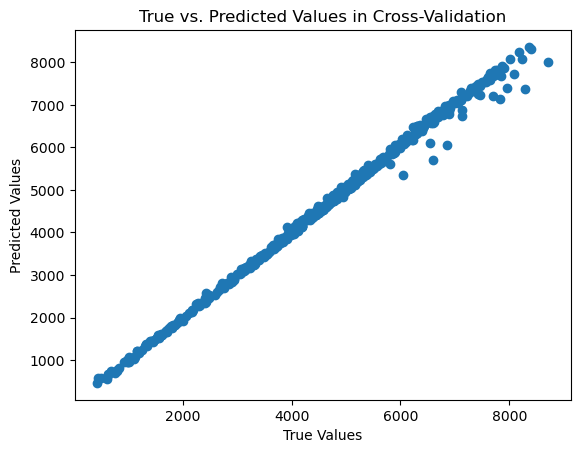

In [44]:
plt.scatter(y_train, predict1)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values in Cross-Validation')
plt.show()

**KNN**


In [45]:
from sklearn.neighbors import KNeighborsRegressor
error_rate = []
for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    # calculate the mean squared error between the predicted values and the actual values (y_test).
    error_rate.append(np.mean((pred_i - y_test) ** 2))

    # Find the k value that gives the smallest error
    optimal_k = error_rate.index(min(error_rate)) + 1
    
print("Optimal k value:", optimal_k)

Optimal k value: 2


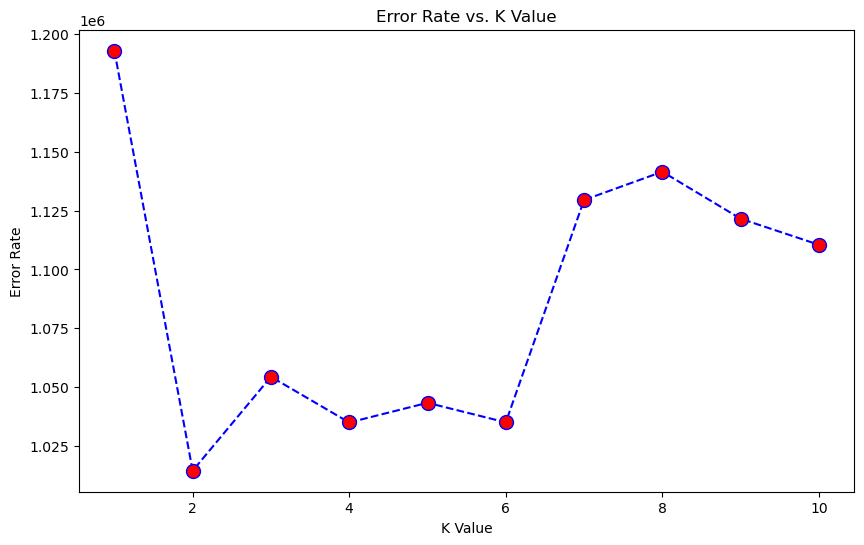

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

If the optimal 'k' value for your KNN regression model is 2, it's perfectly acceptable.(in classification look for odd no because an odd value of 'k' helps in avoiding ties when determining the class.

In [51]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [52]:
y_pred_knn = knn.predict(X_test)

In [53]:
r2score=r2_score(y_test,y_pred_knn)
r2score

0.7450345446201967

In [63]:
mse = mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)
print(mse)
print(mae)

1014498.8977272727
810.0272727272727


In [78]:
cv_knn= cross_val_score(knn,X,y,cv=5) # default scoring method is the R-squared (r2).
print("cross_validation_value:",cv_knn)
print('mean_cv_knn:', cv_knn.mean())
print("Std :",cv_knn.std())

cross_validation_value: [-0.88461034 -4.50623919 -1.82001953 -1.92576869 -0.01603215]
mean_cv_knn: -1.8305339812752197
Std : 1.5070346403247348


**Support Vetor Regression**

In [65]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)
y_pred_svr = regressor.predict(X_test)

In [66]:
R2=r2_score(y_test,y_pred_svr)
R2

-0.004998594973724124

**Decsion tree regressor**

In [60]:
from sklearn.tree import DecisionTreeRegressor
dtrmodel = DecisionTreeRegressor(random_state=36)
dtrmodel.fit(X_train, y_train)
y_pred_dt = dtrmodel.predict(X_test)

In [67]:
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("R-squared (Decision Tree):", r2_dt)
print("Mean Squared Error (Decision Tree):", mse_dt)
print("Mean Absolute Error (Decision Tree):", mae_dt)

R-squared (Decision Tree): 0.9885411129809734
Mean Squared Error (Decision Tree): 45594.52272727273
Mean Absolute Error (Decision Tree): 143.7590909090909


In [166]:
from sklearn.model_selection import cross_val_score
cv_dt= cross_val_score(dtrmodel,X,y,cv=5) # default scoring method is the R-squared (r2).
print("cross_validation_value:",cv_dt)
print('mean_cv_dt:', cv.mean())
print("Std :",cv.std())


cross_validation_value: [0.97613998 0.81588077 0.95672624 0.89013572 0.95855871]
mean_cv_dt: 0.9283249514865645
Std : 0.05591774230655989


In [69]:
# Hyperparameter tuning of DT
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Instantiate the decision tree regressor
dtrmodel = DecisionTreeRegressor(random_state=36)

# Instantiate the grid search object
grid_search = GridSearchCV(dtrmodel, param_grid, cv=5, scoring='r2', verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_) # ###this is mean of those 5 values

#### another way to calculate CV values and here mean and std. dev are printed.
cv_results = grid_search.cv_results_
best_index = grid_search.best_index_
print("Cross validation values:", cv_results['split0_test_score'][best_index], cv_results['split1_test_score'][best_index], cv_results['split2_test_score'][best_index], cv_results['split3_test_score'][best_index], cv_results['split4_test_score'][best_index])
print("Mean:", cv_results['mean_test_score'][best_index])
print("Standard deviation:", cv_results['std_test_score'][best_index])


# Predict on the test data using the best model
y_pred_dt_gs = grid_search.best_estimator_.predict(X_test)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.9819795241157957
Cross validation values: 0.9794601669563042 0.9865001625109588 0.9846239080328545 0.9741308675390813 0.98518251553978
Mean: 0.9819795241157957
Standard deviation: 0.004596447811495798


Cross validation score of DT is good and std dev is below 0.05 which good.

In [70]:
mse_dt = mean_squared_error(y_test, y_pred_dt_gs)
mae_dt = mean_absolute_error(y_test, y_pred_dt_gs)
print(mse_dt)
print(mae_dt)

42487.47636237373
140.4296212121212


**Random Forest**

In [72]:
# Import the library
from sklearn.ensemble import RandomForestRegressor

# Create the regressor with 100 trees
random_forest = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the regressor to the training data
random_forest.fit(X_train, y_train)

# Predict the test data
y_pred_rf = random_forest.predict(X_test)


In [73]:
y_pred_rf

array([6666.09, 1576.61, 3734.28, 6299.32, 7626.17, 7373.54, 1610.8 ,
       2174.88, 7557.05, 5892.07, 1842.19, 3147.22, 4891.21, 5483.05,
       2148.25, 2314.3 , 2145.82, 7911.32, 5381.01, 2362.8 , 7486.07,
       5581.59, 5259.63, 1918.75, 1897.81, 5099.41, 2137.8 , 7469.1 ,
       3915.75, 5618.54, 2805.2 , 3624.97, 6245.11, 7456.06, 6076.34,
       3434.79, 7476.05, 6047.95, 2660.76, 1370.84, 3941.48, 3989.95,
       7412.55, 4959.47, 6875.14,  724.99, 4445.98, 5413.67, 6319.43,
       4933.62, 3265.47, 2442.04, 1038.34, 4417.5 , 4732.85, 4744.07,
       2439.08, 3369.02, 4726.71, 6916.67, 6192.27, 7485.26, 1500.31,
       7781.62, 6664.8 , 6233.12, 7399.42, 4270.21, 2015.77, 7029.42,
       3090.59, 1296.66, 3857.93, 4599.59, 4426.37, 2136.79, 5632.37,
       4743.91, 1427.  , 4396.41, 2105.38, 2022.22, 5685.16,  552.74,
       4083.57, 4083.89, 5423.89, 1244.39, 3645.41, 3393.26, 1519.05,
       7121.34, 5846.41, 5063.25, 3113.1 , 2787.94, 4737.76, 2410.48,
       3337.  , 4944

In [74]:
r2_rf= r2_score(y_test, y_pred_rf)
r2_rf

0.9970115593681554

In [75]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(mse_rf)
print(mae_rf)

11890.903896818181
72.5355


In [77]:
cv_rf= cross_val_score(random_forest,X,y,cv=5) # default scoring method is the R-squared (r2).
print("cross_validation_value:",cv_rf)
print('mean_cv_rf:', cv_rf.mean())
print("Std :",cv_rf.std())

cross_validation_value: [0.98635558 0.97716527 0.97154698 0.93814512 0.96652913]
mean_cv_rf: 0.9679484175664159
Std : 0.016290945491740018


In [80]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node
}

# Create the regressor
random_forest = RandomForestRegressor(random_state=0)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the regressor to the training data with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict using the best estimator
y_pred_rf_tuned = grid_search.best_estimator_.predict(X_test)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [81]:
from sklearn.ensemble import RandomForestRegressor

# Create the regressor with 100 trees
r_forest = RandomForestRegressor(n_estimators=50, random_state=0,max_depth=None,min_samples_leaf=1,min_samples_split=2)

# Fit the regressor to the training data
r_forest.fit(X_train, y_train)

# Predict the test data
y_pred_r = r_forest.predict(X_test)

In [82]:
r2_r= r2_score(y_test, y_pred_r)
r2_r

0.9968489415821296

In [83]:
cv_r= cross_val_score(r_forest,X,y,cv=5) # default scoring method is the R-squared (r2).
print("cross_validation_value:",cv_r)
print('mean_cv_r:', cv_r.mean())
print("Std :",cv_r.std())

cross_validation_value: [0.9852035  0.98061452 0.9703591  0.93768657 0.96608003]
mean_cv_r: 0.9679887443970376
Std : 0.016632747302808983


In [84]:
mse_rf1 = mean_squared_error(y_test, y_pred_r)
mae_rf1 = mean_absolute_error(y_test, y_pred_r)
print(mse_rf1)
print(mae_rf1)

12537.954550909093
75.16736363636363


**Xtreme Gradient boosting**

In [85]:
from xgboost import XGBRegressor  # Import XGBRegressor

# Create an XGBRegressor model
xgb_regressor = XGBRegressor()

# Fit the XGBRegressor model to your training data
xgb_regressor.fit(X_train, y_train)

# Make predictions using the XGBRegressor model
y_hat_regressor = xgb_regressor.predict(X_test)


In [86]:
r2 = r2_score(y_test, y_hat_regressor)
r2

0.9961514527444344

In [94]:
cv_XGB= cross_val_score(xgb_regressor,X,y,cv=5) # default scoring method is the R-squared (r2).
print("cross_validation_value:",cv_XGB)
print('mean_cv_XGB:', cv_XGB.mean())
print("Std :",cv_XGB.std())


cross_validation_value: [0.98917953 0.93263253 0.98556646 0.88075573 0.97183494]
mean_cv_XGB: 0.9519938386284752
Std : 0.04087369409125655


In [88]:
# Hyperparmeter tuning
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
regressorx = XGBRegressor()
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

grid_search = GridSearchCV(regressorx, param_grid, cv=5).fit(X_train, y_train)

In [89]:
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 700}

In [90]:
regressorr = XGBRegressor(learning_rate=0.015,max_depth=5,n_estimators=700)

# Fit the XGBRegressor model to your training data
regressorr.fit(X_train, y_train)

# Make predictions using the XGBRegressor model
y_XGB_pred = regressorr.predict(X_test)

In [91]:
r2 = r2_score(y_test, y_XGB_pred)
r2

0.997302328131466

In [92]:
cv_reg= cross_val_score(regressorr,X,y,cv=5) # default scoring method is the R-squared (r2).
print("cross_validation_value:",cv_reg)
print('mean_cv_reg:', cv_reg.mean())
print("Std :",cv_reg.std())

cross_validation_value: [0.99308114 0.97537652 0.99043767 0.92703587 0.97658519]
mean_cv_reg: 0.9725032797935805
Std : 0.023821390692130188


In [93]:
mse_xgb = mean_squared_error(y_test, y_XGB_pred)
mae_xgb = mean_absolute_error(y_test, y_XGB_pred)
print(mse_xgb)
print(mae_xgb)

10733.944851394746
68.57914054177024


**Challenges faced:**

Rental bike count prediction data was exciting one to perform. i was given 2 csv files  one for hour data and one on day data.

I mailed the SME team regarding same and put forward my view that as problem statement takes into acccount environmental and seasonal settings, so for rental bike count daily basis rather than an hourly basis can have several advantages from a business perspective. I recieved response to go with **Day data**.

Column of dates was in string format so first converted it to date time format and then splited it.

Handelled corrupted data of hum column replacing it with median after proper testing is done.

Hanedelled outlier of windspeed and casual column with suitable method as per volume of outlier present in column.

**Evaluation Report**

Several models were created linear regression, k-nearest neighbors (kNN), support vector regression (SVR), decision tree, and random forest, XGB. The performance of these models was evaluated and it was found that the **simple regression** gave outstanding results. 

Comparison of simple and XGB regression:
The simple regression model has a higher R-squared value (0.9989) than the XGB regressor model (0.9973). 

The simple regression model has a lower mean squared error (MSE) value (4126) than the XGB regressor model (10733). 

The simple regression model has a lower mean absolute error (MAE) value (41) than the XGB regressor model (68).

The simple regression model has a higher accuracy value (0.9989) than the XGB regressor model (0.9973). 

The simple regression model has a higher cross-validation score (0.9908) and a lower standard deviation (0.0101) than the XGB regressor model (0.9725 and 0.023).